In [1]:
import numpy as np

In [2]:
import random as r
import matplotlib.pyplot as plt

In [3]:
def normal(x,m,s):
    numerator = np.exp((-(x-m)**2)/(2*s**2))
    denominator = s * np.sqrt(2*np.pi)
    return numerator/denominator


In [4]:
def random_coin(p):
    unif=r.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True

In [31]:
def gaussian_mcmc(hops,m,s):
    states=[]
    burn_in=int(hops*.1)
    current=r.uniform(-10*s+m,10*s+m)
    for i in range(hops):
        states.append(current)
        movement=r.uniform(-10*s+m,10*s+m)
        curr_prob=normal(x=current,m=m,s=s)
        move_prob=normal(x=movement,m=m,s=s)
        acceptance=min(move_prob/curr_prob,1)
        if random_coin(acceptance):
            current=movement
    return states[burn_in:]            

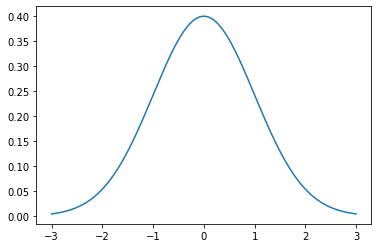

In [32]:
lines=np.linspace(-3,3,1000)
normal_curve=[normal(l,m=0,s=1)for l in lines]
dist=gaussian_mcmc(500000,m=0,s=1)
plt.plot(lines,normal_curve)

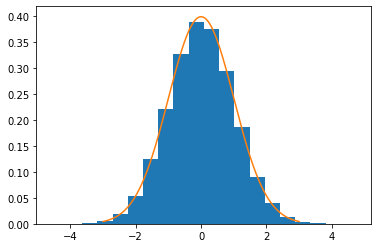

In [33]:
plt.hist(dist,density=1,bins=20)
plt.plot(lines,normal_curve)